In [9]:
import librosa
import librosa.display
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
def visualise_beat(track, sr, beat):
    hop_length = 512
    plt.figure(figsize=(8, 4))
    onset_env = librosa.onset.onset_strength(track, sr=sr, aggregate=np.median)
    times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
    plt.plot(times, librosa.util.normalize(onset_env),
              label='Onset strength')
    plt.vlines(times[beat], 0, 1, alpha=0.5, color='r',
               linestyle='--', label='Beats')
    plt.legend(frameon=True, framealpha=0.75)
    # Limit the plot to a 15-second window
    # plt.xlim(15, 30)
    plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
    plt.tight_layout()
    plt.show()

In [31]:
def find_peacks(track, sr):
    hop_length = 512
    onset_env = librosa.onset.onset_strength(track, sr=sr, aggregate=np.median)
    times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
    onset_env_norm = librosa.util.normalize(onset_env)
    return times[onset_env_norm >= 0.5]

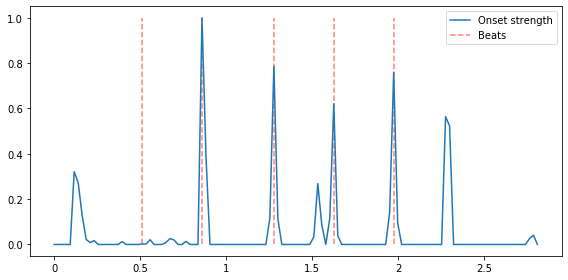

In [10]:
filepath = '../Big Data/Beat-tracker/right/knock1.m4a'
y1, sr1 = librosa.load(filepath)
tempo, beats1 = librosa.beat.beat_track(y=y1, sr=sr1)
# beats = librosa.frames_to_time(beats, sr=sr)

visualise_beat(y1, sr1, beats1)

In [24]:
beat1 = find_peacks(y1, sr1)
beat1

array([0.85913832, 1.27709751, 1.62539683, 1.97369615, 2.27555556,
       2.29877551])

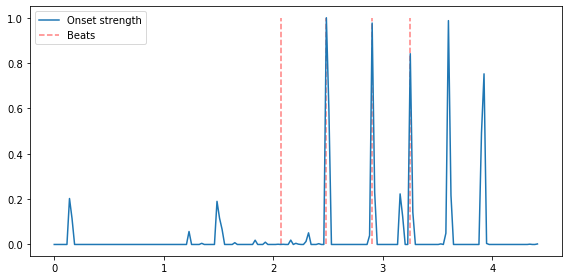

In [11]:
# this beat is supposed to be similar to the previous one
filepath = '../Big Data/Beat-tracker/right/knock2.m4a'
y2, sr2 = librosa.load(filepath)
tempo, beats2 = librosa.beat.beat_track(y=y2, sr=sr2)
# beats = librosa.frames_to_time(beats, sr=sr)
visualise_beat(y2, sr2, beats2)

In [23]:
beat2 = find_peacks(y2, sr2)
beat2

array([2.48453515, 2.5077551 , 2.90249433, 3.25079365, 3.59909297,
       3.92417234])

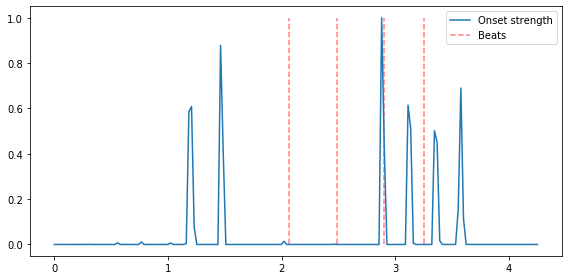

In [13]:
# this beat is supposed to be different from the first two
filepath = '../Big Data/Beat-tracker/wrong/knock4.m4a'
y4, sr4 = librosa.load(filepath)
tempo, beats4 = librosa.beat.beat_track(y=y2, sr=sr2)
# beats = librosa.frames_to_time(beats, sr=sr)
visualise_beat(y4, sr4, beats4)

In [32]:
beat4 = find_peacks(y4, sr4)
beat4

[0.5845468  0.608627   0.87749803 1.         0.6146145  0.5108851
 0.50174135 0.689683  ]
[1.18421769 1.20743764 1.46285714 2.87927438 3.11147392 3.13469388
 3.34367347 3.57587302]


array([1.18421769, 1.20743764, 1.46285714, 2.87927438, 3.11147392,
       3.13469388, 3.34367347, 3.57587302])

In [25]:
from scipy.stats import pearsonr

track1 and track2 are basically the same knocks, so Pearson's correlation coefficient (which shows the strength of the linear relationship between two data samples) should be close either to 1 or -1

In [26]:
corr12, _ = pearsonr(beat1, beat2)
corr12

0.9509422211428424

On the contrary, track4 differs from the first two, so consequently Pearson's correlation coeff. should be close to 0.

In [35]:
# making beats arrays of the same length
max_len = max(len(beat1), len(beat4))
beat1 = np.concatenate((beat1, np.zeros(max_len - len(beat1))), axis=None)
beat4 = np.concatenate((beat4, np.zeros(max_len - len(beat4))), axis=None)

In [36]:
corr14, _ = pearsonr(beat1, beat4)
corr14

-0.11106427571342853

In [37]:
max_len = max(len(beat2), len(beat4))
beat2 = np.concatenate((beat2, np.zeros(max_len - len(beat2))), axis=None)
beat4 = np.concatenate((beat4, np.zeros(max_len - len(beat4))), axis=None)

In [38]:
corr24, _ = pearsonr(beat2, beat4)
corr24

-0.30948156286040596